In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression


#### Import the dataset from csv to dataframe

In [2]:
dataset = pd.read_csv('churn.csv')
dataset.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

#### Check for missing values in the dataset

In [4]:
print(dataset.isnull().sum())

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64


#### What is the percantage of the customers that are leaving?  -r

In [5]:
num_retained=dataset[dataset['class']==0].shape[0]
num_churned=dataset[dataset['class']==1].shape[0]

#Print the percentage of customers that stayed
print(num_retained/(num_retained + num_churned)* 100, '% of the customers that stayed with the company')
#Print the percentage of customers that churned
print(num_churned/(num_retained + num_churned)* 100, '% of the customers that left the company')

85.86 % of the customers that stayed with the company
14.14 % of the customers that left the company


#### How international_plan indicates the churn -r

<AxesSubplot: xlabel='international_plan', ylabel='count'>

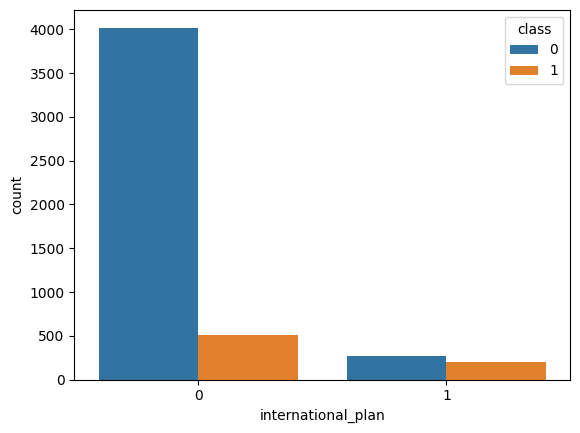

In [6]:
sns.countplot(x='international_plan', hue='class', data=dataset)

#### How  day charge and number of customer service calls  indicates the churn: -r
##### Most of the customers who churn have a day charge between 40 and 50, and  call the customer service at least one time.

array([<AxesSubplot: title={'center': 'total_day_charge'}>,
       <AxesSubplot: title={'center': 'number_customer_service_calls'}>],
      dtype=object)

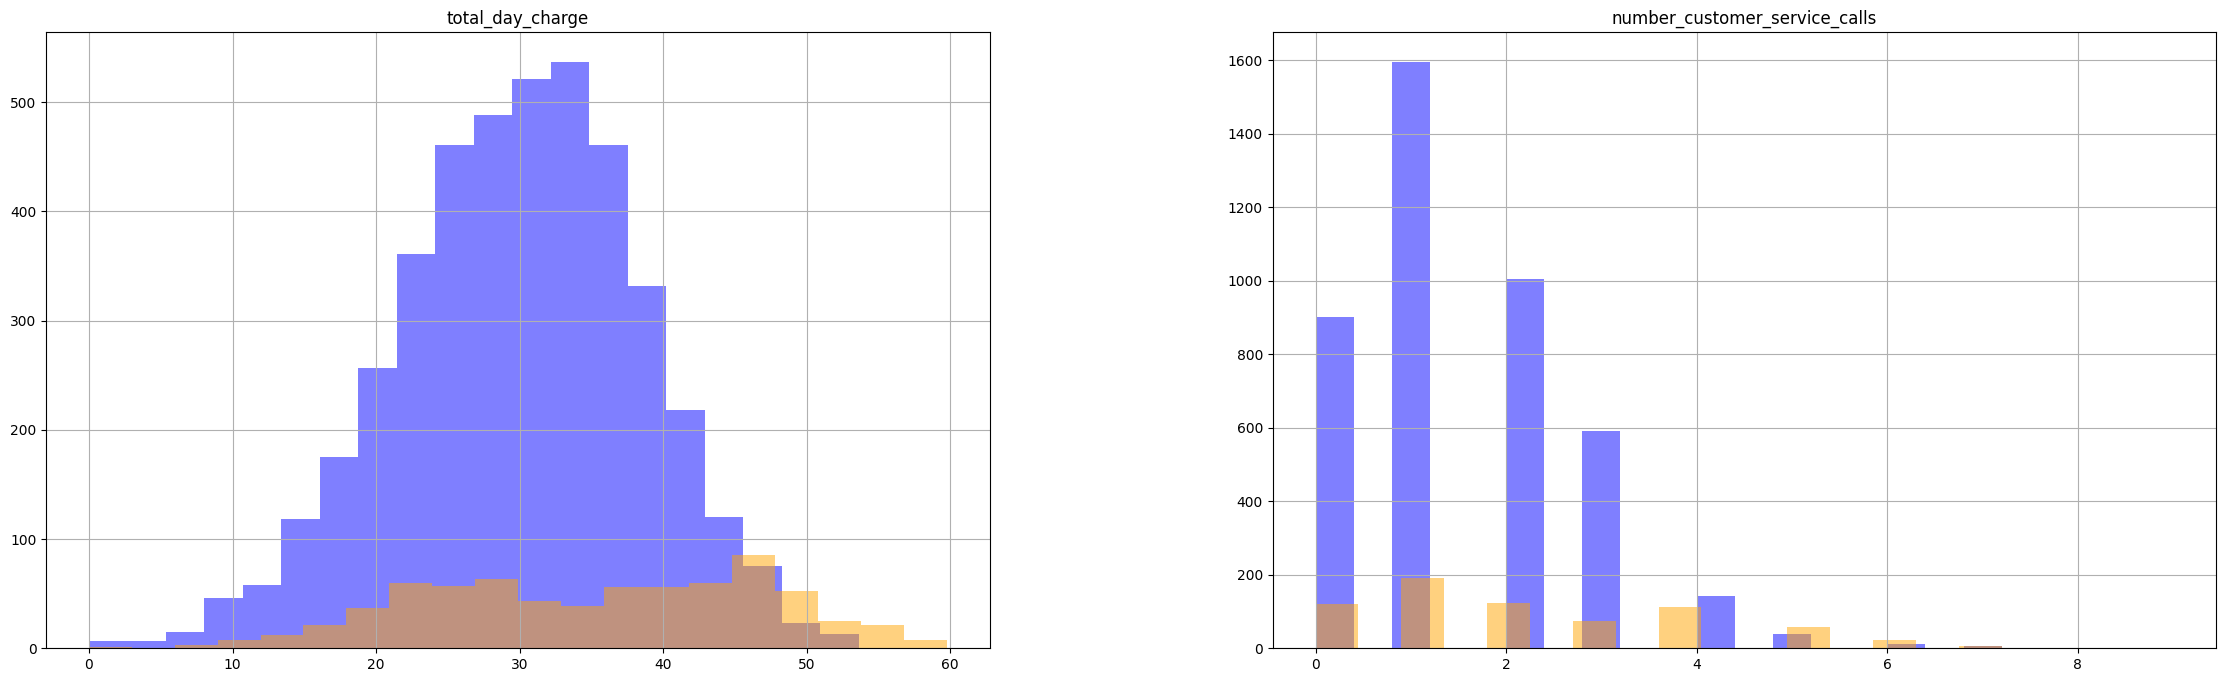

In [7]:
numerical_features=['total_day_charge','number_customer_service_calls']
fig, ax=plt.subplots(1,2, figsize=(28,8))
dataset[dataset["class"]==0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
dataset[dataset["class"]==1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)

Removed the categorical columns from the dataset and saved the rest in ```numeric_attrb_dataset``` dataframe.

In [8]:
numeric_attrb_dataset = dataset.drop([
"state",
"area_code",
"phone_number",
"international_plan",
"voice_mail_plan",
"class"
], axis=1)
numeric_attrb_dataset.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


#### Check the main statistical parameters of the dataset.

In [9]:
numeric_attrb_dataset.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Correltion heatmap

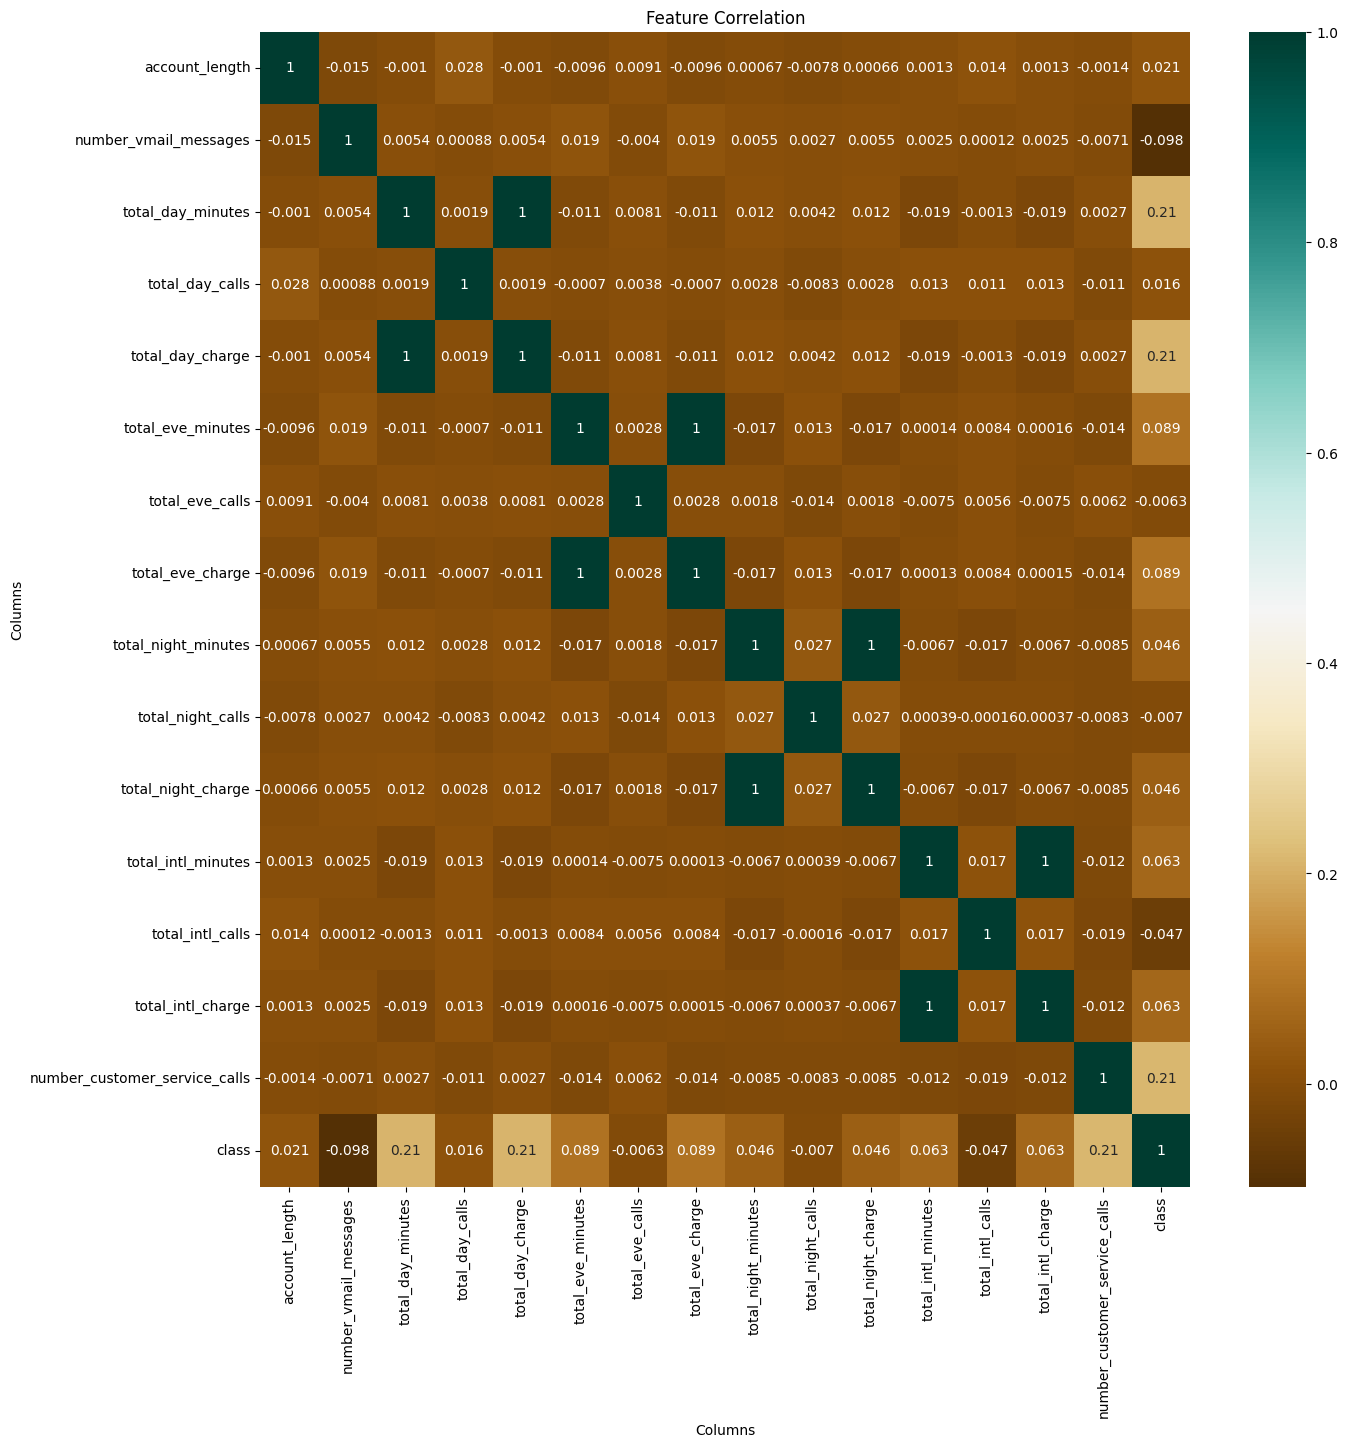

In [10]:
# Check the correlation between the quantitivve atrribytes and the class column
ds = numeric_attrb_dataset
ds["class"] = dataset["class"]
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(ds.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Describe which of the attributes have poritive/negative strong/weak correlation.
however, I will feed the whole dataset to the machine learning model.






#### Split the data in train and test

In [11]:
target_class = dataset["class"]
other_columns = numeric_attrb_dataset


other_columns_train, other_columns_test, target_class_train, target_class_test = train_test_split(other_columns,target_class, test_size=0.2)

Train a Logistic Regression Model

In [12]:
lrm = LogisticRegression()
lrm.fit(other_columns_train,target_class_train)

C:\Users\rbutka\PycharmProjects\python\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Make a prediction on the rest of the dataset that we are testing

In [13]:
lrm_prediction = lrm.predict(other_columns_test)
# lrm_prediction

In [14]:
# Evaluate the models accuracy
print('Logistic Regression Performance:\n')
lrm_mae = metrics.mean_absolute_error(target_class_test, lrm_prediction)

print('MAE:', lrm_mae)

Logistic Regression Performance:

MAE: 0.02


The probability for a wrong prediction is pretty low. This means the model makes a decent prediction.

In [15]:
# Predict if a customer will leave
# Suposing the class cumon does not exist and we have no knowlede weather a custome will leave
prediction = lrm.predict(numeric_attrb_dataset)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# convert the prediction to dataframe
pred_per_customer= pd.DataFrame(prediction,columns=["prediction_class"])
pred_per_customer["real_class"] = dataset["class"]
pred_per_customer["phone_number"] = dataset["phone_number"]
pred_per_customer["state"] = dataset["state"]
pred_per_customer

,prediction_class,real_class,phone_number,state
0,0,0,2845,16
1,0,0,2301,35
2,0,0,1616,31
3,0,0,2510,35
4,0,0,155,36
...,...,...,...,...
4995,0,0,2000,11
4996,1,1,394,49
4997,0,0,313,7
4998,0,0,3471,7


In [24]:
# Filter the numbers that  will churn
current_customers = pred_per_customer[pred_per_customer['real_class'] == 0]
will_churn_customers = current_customers[current_customers['prediction_class'] == 1]
will_churn_customers

,prediction_class,real_class,phone_number,state
22,1,0,1618,3
100,1,0,2701,12
272,1,0,196,1
298,1,0,3702,21
377,1,0,1872,28
534,1,0,2401,18
674,1,0,951,8
756,1,0,181,50
902,1,0,3457,11
921,1,0,3040,39


The phone numbers shown in the list above are predicted by the model that will churn.
So, knowing this information would help us identify them make customised offers that would change this prediction.